Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


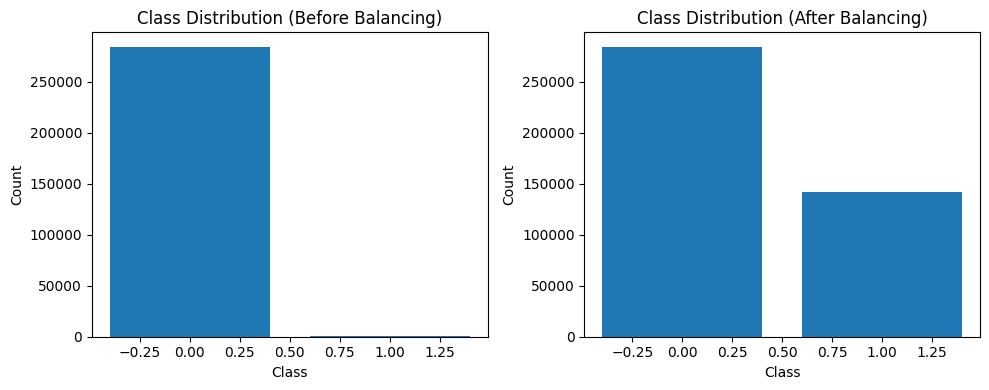

Epoch 1/10
6664/6664 [==============================] - 25s 4ms/step - loss: 11.2996 - accuracy: 0.7262
Epoch 2/10
6664/6664 [==============================] - 23s 4ms/step - loss: 0.4818 - accuracy: 0.7989
Epoch 3/10
6664/6664 [==============================] - 23s 3ms/step - loss: 0.4676 - accuracy: 0.8185
Epoch 4/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.3752 - accuracy: 0.8664
Epoch 5/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.2968 - accuracy: 0.9094
Epoch 6/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.2349 - accuracy: 0.9380
Epoch 7/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.1667 - accuracy: 0.9604
Epoch 8/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.1281 - accuracy: 0.9712
Epoch 9/10
6664/6664 [==============================] - 24s 4ms/step - loss: 0.1055 - accuracy: 0.9750
Epoch 10/10
1781/1781 [==============================] - 3s 2ms/step - l

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive
drive.mount('/content/gdrive/')
# Load the dataset
data = pd.read_csv("/content/gdrive/My Drive/creditcard.csv")

# Separate features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]
# Split the data into train and test sets
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
oversampler = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

original_counts = y.value_counts()
balanced_counts = pd.Series(y_resampled).value_counts()

# Count the occurrences of each class in the balanced dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)



# Plot the class distribution before and after balancing
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(original_counts.index, original_counts.values)
plt.title('Class Distribution (Before Balancing)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(balanced_counts.index, balanced_counts.values)
plt.title('Class Distribution (After Balancing)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2)) #Reduce spatial dimensions (Width and Height)
model.add(Flatten()) #After pooling, we flatten to make a one dimensional vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_resampled, y_resampled, epochs=10, batch_size=64, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)